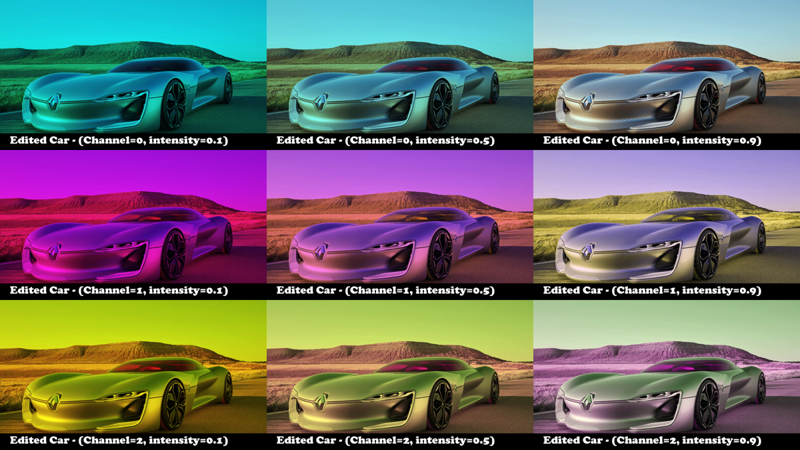

In [19]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont

# read image and convert to RGB
image=Image.open("car.jpg")
image=image.convert('RGB')

# build a list of 9 images
images=[]
for i in range(3):
    for j in [0.1, 0.5, 0.9]:
        # Changing channels colors
        channels = list(image.split())
        channels[i] = channels[0].point(lambda c: c * j)
        new_image = Image.merge('RGB', channels)
        
        # 905*911
        # Adding text
        draw = ImageDraw.Draw(new_image)
        text_font = ImageFont.truetype('font.TTF', size=33)
        text_content = "Edited Car - (Channel={}, intensity={})".format(i, j)
        text_color = (255, 255, 255)
        text_position = (30, 400)

        rectangle_position = [(0,400), (905, 450)]
        
        draw.rectangle(rectangle_position, fill="black")
        draw.text(text_position, text_content, font=text_font, fill=text_color)
       
        images.append(new_image)

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
contact_sheet.save("contact_sheet.png")
th = contact_sheet.thumbnail((100,100))
display(contact_sheet)